In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 3.2 Games in normal form

In the previous section we introduced the idea of using utility to represent agent's preferences, and had an example problem where an agent had to make a decision where the aim was to maximise their utility. But what about when there are multiple agents?

With multiple agents we need to consider the utility of each agent given the action of all agents. We can represent this for two agents in a grid, where the row is the action of the first player, and the columns are the action of the second. Each cell contains the utility pair (first, second).

### 3.2.1 Example: 

Consider this example, where both agents can cooperate (C) or defect (D):

$
\begin{array}{c|cc}
\text{} & \text{C} & \text{D} \\
\hline
\text{C} & 5,5 & 0,8 \\
\text{D} & 8,0 & 2,2 \\
\end{array}
$

If both players cooperate they get a benefit of 5 each. If one cooperates and one defects they get overall 8, with one person getting 0. And if both defect they get 2. The best option is obviously (C,C). However, due to the incentives the outcome that ends up happening is the worst, (D,D). This is because regardless of what the other player does your best option is to defect. If the other player cooperates you can cooperate and get 5, or defect and get 8. If the other player defects you can cooperate and get 0, or defect and get 2.

### 3.2.2 Definition of normal form games

A normal form game is defined by a set of players $N$, an action space (action for each agent) $A$, and $u$, a set of utility functions for each agent relating action to their utility, $u_i:A\rightarrow \mathbb{R}$. Note: here we are assuming for now $A=O$, the set of options.

### 3.2.3 Some examples

#### Prisoners dilemma

The problem above is an example of a prisoners dilemma, where the outcome is defection. The general form of a prisoners dilemma looks like

$
\begin{array}{c|cc}
\text{} & \text{C} & \text{D} \\
\hline
\text{C} & a,a & b,c \\
\text{D} & c,b & d,d \\
\end{array}
$

Where $c>a>d>b$.

#### Common-payoff games

In a common-payoff game the utility of each agent is the same for each action vector. In these cases we are back to what was discussed in Chapter 1 and 2, as all agents are working to a common goal.

#### Zero-sum games

A zero-sum game is somewhat the opposite of a common-payoff game. In the two player case, a game is zero-sum if for every action $a_1$ and $a_2$ there is a constant $c$ such that $u_1(a_1)+u_2(a_2)=c$. An example of a zero-sum game is paper-scissors-rock, which has this table:

$
\begin{array}{c|ccc}
\text{} & \text{Rock} & \text{Paper} & \text{Scissors} \\
\hline
\text{Rock} & 0,0 & -1,1 & 1,-1 \\
\text{Paper} & 1,-1 & 0,0 & -1,1 \\
\text{Scissors} & -1,1 & 1,-1 & 0,0 \\
\end{array}
$

#### Battle of the sexes

Sometimes we have games which involve both cooperation and competition. Imagine you have a couple seeing a movie. They both have a preference for a film, and a preference to see it together.

$
\begin{array}{c|cc}
\text{} & \text{A} & \text{B} \\
\hline
\text{A} & 2,1 & 0,0 \\
\text{B} & 0,0 & 1,2 \\
\end{array}
$

### 3.2.4 Strategies in normal games

One strategy in these games is to simply select an action and stick to it. We call this a *pure* strategy. Another option is to have a somewhat random action, which we call a *mixed* strategy. Combinations of probabilities then are essentially the actions. For notation we call the set of actions with a non-zero weight the *support* of a given strategy. The utility of this new action is the expectation of the utility of the individual actions given their probabilities. 

When we have a simple game with two players where each player makes 1 of 2 actions, we can generalise the two strategies to the selection of a single number - the probability of doing the first rather than the second. Then we can see the payoff as the probability changes.

payoffs:
(5, 5) (0, 8)
(8, 0) (2, 2)


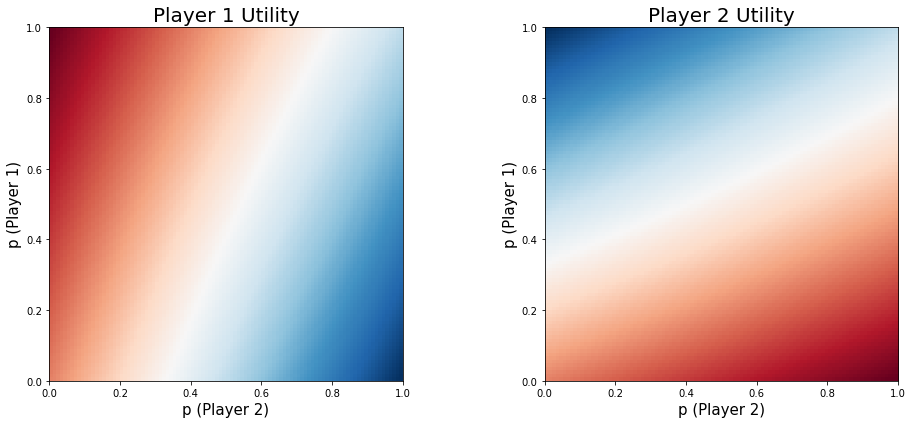

In [2]:
# payoffs (player 1 action x player 2 action)
player1_payoff = np.array([[5,0],[8,2]])
player2_payoff = np.array([[5,8],[0,2]])
print("payoffs:")
for i in range(2):
    row = []
    for j in range(2):
        row.append(f"({player1_payoff[i, j]}, {player2_payoff[i, j]})")
    print(" ".join(row))

# define the utility for each players probability of doing the first action (cooperate)
def mixed_utility_2_player_2_actions(payoff1,payoff2,prob1,prob2):
    action_probabilities = np.array([[prob1*prob2,prob1*(1-prob2)],[(1-prob1)*prob2,(1-prob1)*(1-prob2)]])
    expected_benefit1 = np.sum(action_probabilities*payoff1)
    expected_benefit2 = np.sum(action_probabilities*payoff2)
    return expected_benefit1,expected_benefit2

# get the utilities
sample_p = np.linspace(0,1,100)
sample_p1_value_matrix = np.zeros((len(sample_p),len(sample_p)))
sample_p2_value_matrix = np.zeros((len(sample_p),len(sample_p)))
for row in range(len(sample_p)):
    for col in range(len(sample_p)):
        p1 = sample_p[row]
        p2 = sample_p[col]
        v1,v2 = mixed_utility_2_player_2_actions(player1_payoff,player2_payoff,p1,p2)
        sample_p1_value_matrix[row,col]=v1
        sample_p2_value_matrix[row,col]=v2

# make plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        
# Player 1 Heatmap
c1 = axes[0].imshow(sample_p1_value_matrix, extent=[0, 1, 0, 1], origin='lower', cmap='RdBu', aspect='equal')
axes[0].set_title("Player 1 Utility",fontsize=20)
axes[0].set_xlabel("p (Player 2)",fontsize=15)
axes[0].set_ylabel("p (Player 1)",fontsize=15)

# Player 2 Heatmap
c2 = axes[1].imshow(sample_p2_value_matrix, extent=[0, 1, 0, 1], origin='lower', cmap='RdBu', aspect='equal')
axes[1].set_title("Player 2 Utility",fontsize=20)
axes[1].set_xlabel("p (Player 2)",fontsize=15)
axes[1].set_ylabel("p (Player 1)",fontsize=15)
plt.tight_layout()
plt.show()

This is the prisoners dilemma, but with each player having a probability of cooperating. Unsuprisingly, the gradient on both of these graphs points to defecting.